# Milestone 2: Clouds of points

In [9]:
import random                  
import math
import numpy as np
from matplotlib import pyplot as plt
from fractions import Fraction
from music21 import chord, corpus, environment, meter, midi, note, stream, tempo, converter

def play(stream):
    """Shortcut to play a stream"""
    midi.realtime.StreamPlayer(stream).play()

In [18]:
# Determines the repertoire of notes that will be used in the cloud
pitches = [x for x in range(1, 128) if (x % 12) in [0, 7, 2, 9, 4]]

In [51]:
# Generates a cloud of notes given 3 functions, which determine the position,
# width and intensity of the cloud throughout time
def generate_cloud(position, width, intensity, start_time, end_time, step, pitches):
    m = stream.Measure()
    t = start_time
    while t <= end_time:
        notes = []
        pos = position(t)
        w = width(t)
        i = intensity(t)
        for p in pitches:
            if p >= pos - w and p <= pos + w:
                if random.uniform(0, 1) <= i:
                    n = note.Note(pitch=p, quarterLength = step);
                    notes.append(n)
        c = chord.Chord(notes);
        m.append(c)
        t += step
    return m

In [55]:
m = generate_cloud(lambda t: 60 + 12*math.sin(t), 
                   lambda t: 6 + 3*math.sin(t),
                   lambda t: 0.5 - 1./5*math.sin(1./2 * t), 0, 16, 0.125, pitches)

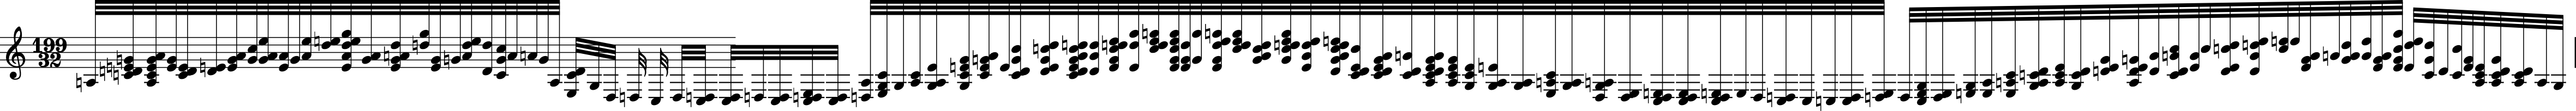

In [56]:
m.show()

In [57]:
play(m)